## KNN 접근 :K-Nearest Neighbor Classifier


knn : 데이터간 거리를 계산하여 가장 가까운 거리에 있는 데이터 n개  를  나의 nighbors 이라고 분류하는 분류방법  
regression이면 k개 결과의 평균값  
classification이면 k개 관측치의 class/카테고리 중 최다수를   
  차지하는 클래스를 답으로 준다.  

<img src="./img/knn.png" width="500px" height="500px" align="left">


knn :  분석하려는 데이터가 수치형 일때   
나이베이즈 :  분석하려는 데이터가 명목형일때   


나이브 베이즈 :  확률을 이용하여 분류하는 분류기법

#### k개의 가장 가까운 훈련 인스턴스를 골라 가장 많은 레이블을 분류로 선택
####  크기조절(스케일링)이 필요

similarity :  1.0에 가까울수록 유사함
 Cosine Similarity 
 Jaccard Coefficient
 


distance: 0에 가까울수록 유사함  
 Euclidean Distance($L_2$ distance)   
 Manhattan distance(맨허튼 거리, $L_1$ 거리)  


 유클리드 공간의 점과 점 사이의 직선거리 사용



<img src="./img/distance1.png" width="300px" height="400px" align="left">  


$ \sqrt\sum_{i=0}^{n} \ (y_i- \hat y_i)^2 $

Manhuttan distance ($L_1$)  
<img src="./img/distance3.png" width="450px" height="50px" align="left"> 
<div style="clear:both;padding-top:10px">
<img src="./img/distance2.png" width="450px" height="450px" align="left">

In [207]:
from sklearn.metrics.pairwise import euclidean_distances
x1 = [[0, 1], [1, 1]]
x2=[[1,1],[1,2]]
print(euclidean_distances(x1, x2))
print(euclidean_distances(x1, [[0, 0]]) )


[[1.         1.41421356]
 [0.         1.        ]]
[[1.        ]
 [1.41421356]]


   고객  연령    현주소 거주 기간   거주형태(1=소유, 2=임대, 3=기타)  
t1  A       23       2                 2      

t2   B      40        10               1


d(A,B) = $ \sqrt{(23-40)^2 +(2-10)^2 + (2-1)^2} $

코사인 유사도: 두 벡터간의 코사인 각도를 이용하여 구할 수 있는 
두 벡터의 유사도를 의미  
두 벡터 방향이 완전히 동일할 경우 1   
$90\,^{\circ}$ 각도시 0   
$180\,^{\circ}$ 반대의 방향을 가지면 -1을 갖게 된다.   
#### 유사도는 -1~1까지 값을 가지며 1에 가까울 수록 유사도가 높다. 

<img src="./img/cos_simu.png" width="300px" height="300px" align="left">
<div style="clear:both; padding-top:10px">
<img src="./img/cos_simu2.png" width="500px" height="500px" align="left">



sim(A,B)=$ \frac{(23x40)+(2x10)+(2x1)}{\sqrt{23^2+2^2+2^2} x \sqrt{40^2+10^2+1^2} }$

Jaccard Coefficient
두 집합 사이의 유사도를 측정하는 방법
두집합이 동일하면 1, 공통원소가 하나도 없으면 0

<img src="./img/jaccard.png" width="400px" height="400px" align="left">

#### K-NN (K-Nearest Neighbors) 알고리즘


In [208]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
from sklearn.datasets import load_iris

In [209]:
iris=load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names )
iris_df['species']=iris.target

In [210]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [211]:
y=iris_df['species'].copy()
del iris_df['species']

In [212]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [213]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_df, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


[[10  0  0]
 [ 0  9  2]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.82      0.90        11
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [216]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris=load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names )
iris_df['species']=iris.target

y=iris_df['species'].copy()
del iris_df['species']


x_train, x_test, y_train, y_test = train_test_split(iris_df, y, test_size=0.2, shuffle=True)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

data=classifier.score(x_train, y_train)
print(data)

0.9583333333333334


In [219]:
y_pred_proba = classifier.predict_proba(x_test)[:,1]

In [220]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [221]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [225]:
import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
# load dataset
pima = pd.read_csv("./data/diabetes.csv",header=0)
pima.rename({j: i for i, j in zip(col_names, pima.columns)}, axis=1, inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [226]:
positive=pima[pima['outcome']==1].copy()
negative=pima[pima['outcome']==0].copy()

In [227]:
print(positive.head())
print(negative.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  outcome
0         6      148  72    35        0  33.6     0.627   50        1
2         8      183  64     0        0  23.3     0.672   32        1
4         0      137  40    35      168  43.1     2.288   33        1
6         3       78  50    32       88  31.0     0.248   26        1
8         2      197  70    45      543  30.5     0.158   53        1
    pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  outcome
1          1       85  66    29        0  26.6     0.351   31        0
3          1       89  66    23       94  28.1     0.167   21        0
5          5      116  74     0        0  25.6     0.201   30        0
7         10      115   0     0        0  35.3     0.134   29        0
10         4      110  92     0        0  37.6     0.191   30        0


In [228]:
print(positive.info())
print(negative.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  268 non-null    int64  
 1   glucose   268 non-null    int64  
 2   bp        268 non-null    int64  
 3   skin      268 non-null    int64  
 4   insulin   268 non-null    int64  
 5   bmi       268 non-null    float64
 6   pedigree  268 non-null    float64
 7   age       268 non-null    int64  
 8   outcome   268 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 20.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  500 non-null    int64  
 1   glucose   500 non-null    int64  
 2   bp        500 non-null    int64  
 3   skin      500 non-null    int64  
 4   insulin   500 non-null    int64  
 5   bmi       500 non-null    flo

In [229]:
print(positive.isnull().sum())
print(negative.isnull().sum())

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
outcome     0
dtype: int64
pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
outcome     0
dtype: int64


In [230]:
for index in positive.columns:
    positive[index].fillna(positive[index].mean(),inplace=True)

In [231]:
for index in negative.columns:
    negative[index].fillna(negative[index].mean(),inplace=True)

In [232]:
pima=pd.concat([positive, negative],ignore_index=True)

In [233]:
y=pima.iloc[:, -1]
x=pima.iloc[:, :-1]

In [234]:
print((y==1).sum())
print((y==0).sum())

268
500


In [235]:
y

0      1
1      1
2      1
3      1
4      1
      ..
763    0
764    0
765    0
766    0
767    0
Name: outcome, Length: 768, dtype: int64

In [247]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [249]:
from sklearn.metrics import classification_report, confusion_matrix


neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train, y_train)
    
    train_accuracy[i]=knn.score(x_train, y_train)
    
    test_accuracy[i]=knn.score(x_test, y_test)


In [253]:
from sklearn.metrics import roc_curve

y_pred = knn.predict(x_test)
y_pred_proba = knn.predict_proba(x_test)[:,1]


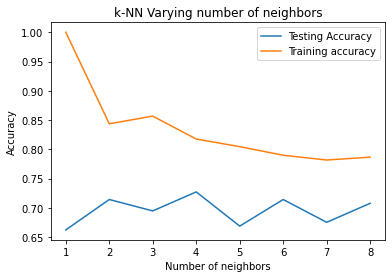

In [254]:
import matplotlib.pyplot as plt

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [255]:
from sklearn.metrics import confusion_matrix

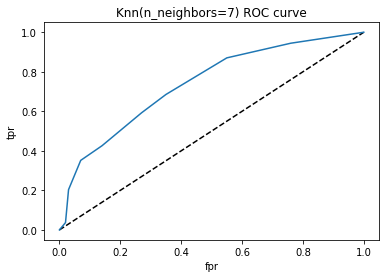

In [258]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()